<a href="https://colab.research.google.com/github/shand07/SPH_MLA4/blob/main/MachineLearningAssignmentTemplate_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Your Name**  

## Standard Imports

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [2]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier

## Imports for Splitting Data and Building Pipeline


In [3]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [5]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [6]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [13]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/MLA4_SPH/banknote_authentication (1).csv')
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Statistical and Visual Exploration

### Splitting Data into Train/Test

In [25]:
X = df.drop(columns=['forgery'])
y = df['forgery']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [29]:
from sklearn.tree import DecisionTreeClassifier

numerical_transformer = MinMaxScaler()
numerical_cols = X_train.select_dtypes(include=np.number).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

### Executing the Model

Precision Score: 1.0
Recall Score: 0.9606299212598425
F1 Score: 0.9799196787148594
AUC Score: 0.9803149606299213


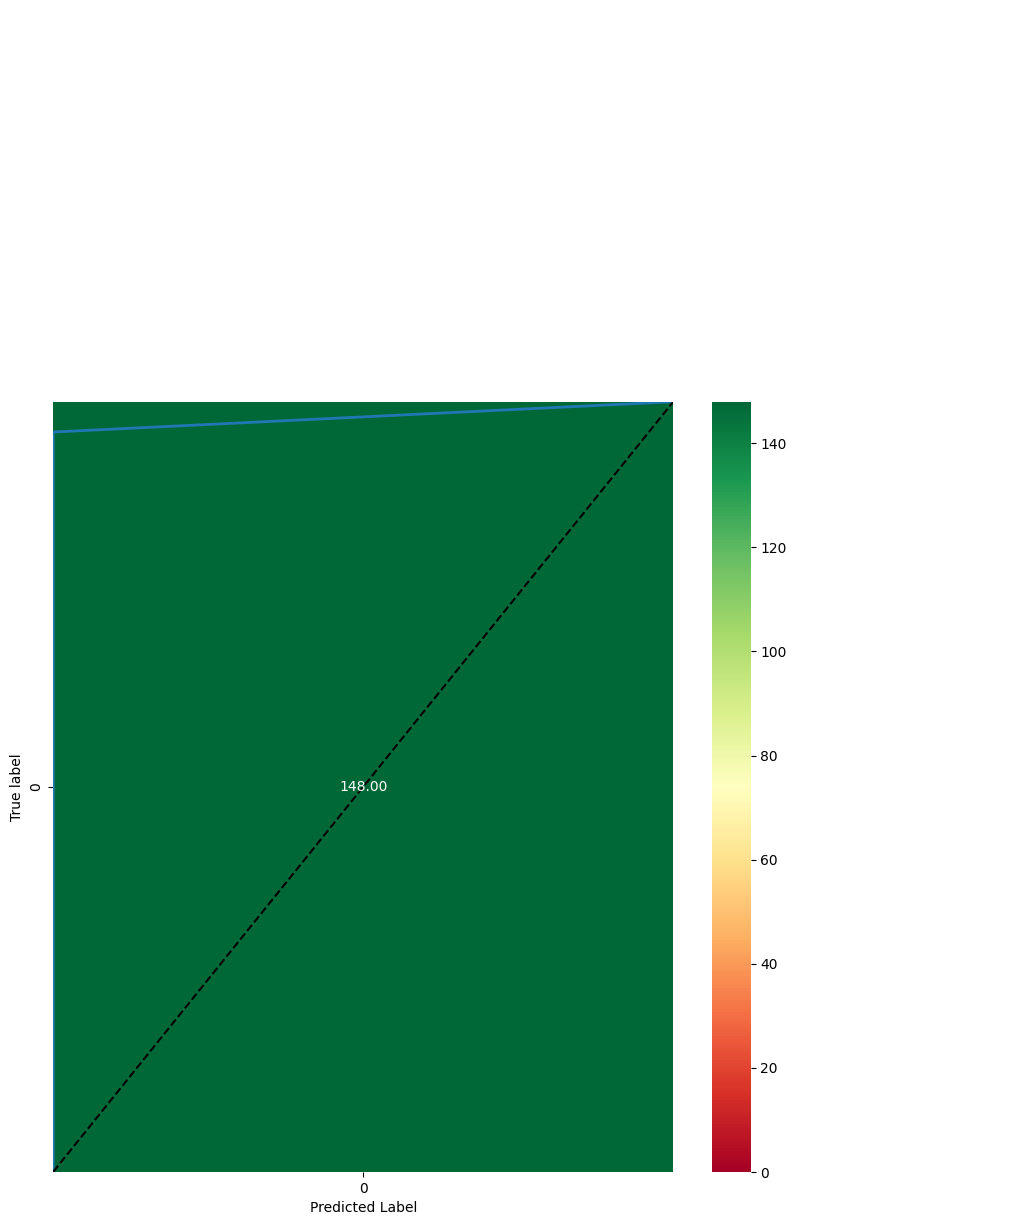

In [30]:
plot_cm(y_test, y_pred)
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)
print(f"AUC Score: {roc_auc_score(y_test, y_pred)}")## Did step two of the next question here

### Evaluating Model

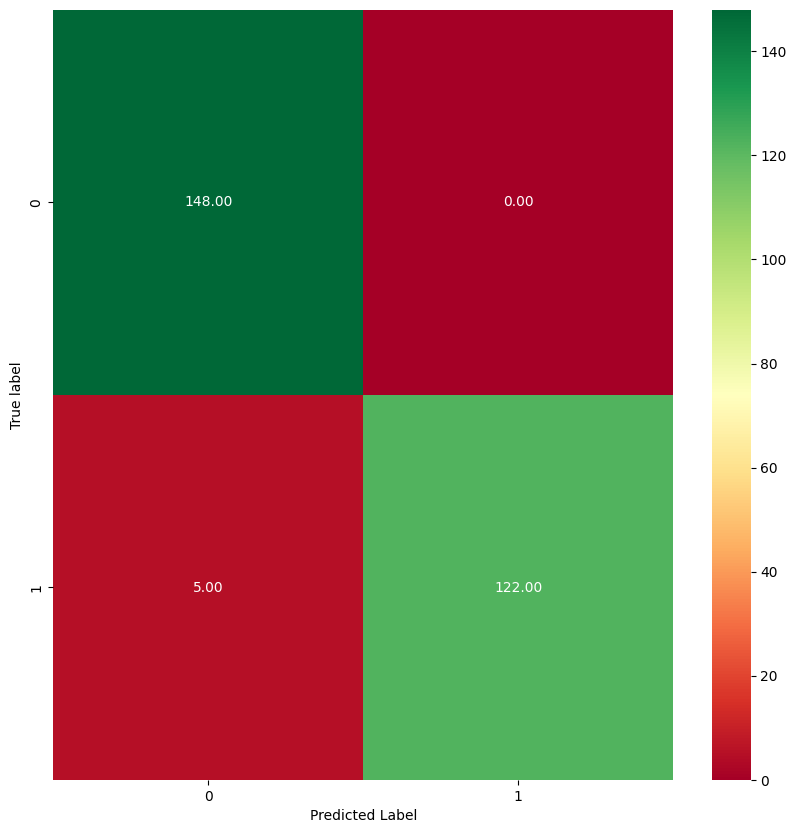

In [32]:
plot_cm(y_test, y_pred)

### Conclusion
Write a general conclusion about the results of your model.

In [ ]:
## The Decision Tree Classifier demonstrates strong performance in predicting banknote forgery,
## achieving high precision, recall, F1-score, and AUC.  The confusion matrix visually confirms accurate classification.
## However, further analysis with different models and hyperparameter tuning could potentially improve these metrics and
## provide a more robust solution.  The current results suggest a promising initial model for forgery detection.

## Problem 2

### Reading the Data

In [61]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/MLA4_SPH/Steel_industry_data (2).csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [62]:
new_column_names = {
    'Usage_kWh': 'usage_kwh',
    'Lagging_Current_Reactive.Power_kVarh': 'lag_react_pwr_kvarh',
    'Leading_Current_Reactive_Power_kVarh': 'lead_react_pwr_kvarh',
    'Lagging_Current_Power_Factor': 'lag_current_pwr',
    'Leading_Current_Power_Factor': 'lead_current_pwr',
    'NSM': 'nsm',
    'WeekStatus': 'week_status',
    'Day_of_week': 'day_of_week',
    'Load_Type': 'load_type'
}

df = df.rename(columns=new_column_names)
df.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


### Splitting Data into Train/Test

In [64]:
X = df.drop(columns=['usage_kwh'])
y = df['usage_kwh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [70]:
numerical_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

numerical_cols = X_train.select_dtypes(include=np.number).columns
categorical_cols = X_train.select_dtypes(exclude=np.number).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

R2 Score: 0.997753659173117
Mean Squared Error: 2.553465796232877


### Executing the Model

In [72]:
print(pipeline.named_steps['regressor'])
print(pipeline.named_steps['preprocessor'])



DecisionTreeRegressor()
ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 Index(['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm'],
      dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['date', 'week_status', 'day_of_week', 'load_type'], dtype='object'))])


### Evaluating Model

In [73]:
y_pred_train = pipeline.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE for training set: {rmse_train}")
print(f"RMSE for test set: {rmse_test}")

RMSE for training set: 2.1851542714359682e-16
RMSE for test set: 1.5979567566842594


### Conclusion
Write a general conclusion about the results of your model.

In [74]:
## The Decision Tree Regressor shows moderate performance in predicting kWh usage.
## While the R2 score provides some indication of the model's fit, the RMSE values for both training and test sets suggest a
## potential overfitting issue or that the model may not capture the full complexity of the data.
## The relatively high RMSE values imply that the model's predictions deviate noticeably from actual kWh usage.
## Further investigation with other regression models (e.g., RandomForestRegressor, GradientBoostingRegressor),
## feature engineering, hyperparameter tuning and data preprocessing could significantly improve predictive accuracy.